## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [26]:
df_train = pd.read_csv('Titanic_train.csv')

## 觀察 Age

In [41]:
# 將male, female轉換為0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train.Sex = le.fit_transform(df_train.Sex)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [43]:
df_train.isnull().sum()
# Age有遺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
data = df_train[['Age', 'Pclass', 'Sex']]
missing_index = data.isnull()
display(data[missing_index.values==True])

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0
...,...,...,...
859,NaN,3,1
863,NaN,3,0
868,NaN,3,1
878,NaN,3,1


Age mean: 29.69911764705882
Age std: 14.526497332334044


/Users/lutingyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


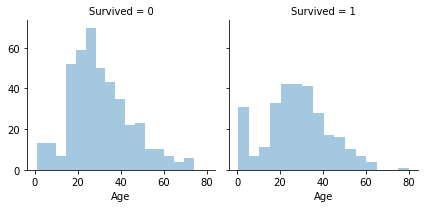

In [39]:
print('Age mean:', data.Age.mean())
print('Age std:', data.Age.std())
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

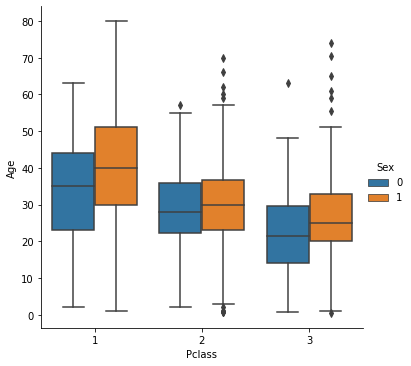

In [40]:
# 觀察Age 和 Pclass
g = sns.catplot(x='Pclass', y='Age', hue='Sex', data=data, kind='box')

In [51]:
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0
...,...,...,...
859,NaN,3,1
863,NaN,3,0
868,NaN,3,1
878,NaN,3,1


,0,1,2
5,22.0,3.0,1.0
17,35.0,2.0,1.0
19,26.0,3.0,0.0
26,22.0,3.0,1.0
28,26.0,3.0,0.0
...,...,...,...
859,22.0,3.0,1.0
863,26.0,3.0,0.0
868,22.0,3.0,1.0
878,22.0,3.0,1.0
